# Stu McGorman

## Research question/interests
I am interested in exploring the relationship between larger scale climate patterns and forest fires. I have found a second dataset which contains monthly Oceanic Niño Index (ONI) values which measure the temperature anomaly in the pacific ocean. This value is used to indicate El Nino and La Nina years. I am going to use this data to explore if and how fire trends change during El Nino and La Nina years and to explore weather the ONI can be use to make predictions about forest fires.

In [16]:
# Imports
import project_functions1
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Import and Process Data (will take a sec)

In [3]:
fireData = project_functions1.loadAndProcessFireData("../data/raw")
ONIData = project_functions1.loadAndProcessONIData("../data/raw/ONI_Data.txt")
ONIByYear = project_functions1.createONIByYear(ONIData)
dataByMonth = project_functions1.createDataByMonth(fireData, ONIData)
dataByCause = project_functions1.createDataByCause(fireData, ONIByYear)
dataBySize = project_functions1.createDataBySize(fireData, ONIByYear)

pd.set_option('display.min_rows', 30)
pd.set_option('display.max_rows', 100)
display(dataByMonth)
display(dataByCause)
display(dataBySize)

,Year,Jurisdiction,Month,Area (hectares),Number,ONI,Phase,DateTime
0,1990,Alberta,January,0.10,1,0.14,N,1990-01-01
4,1990,Alberta,February,3.30,5,0.21,N,1990-02-01
5,1990,Alberta,March,6.60,8,0.28,N,1990-03-01
6,1990,Alberta,April,25.10,26,0.29,N,1990-04-01
7,1990,Alberta,May,624.20,110,0.29,N,1990-05-01
8,1990,Alberta,June,1704.30,196,0.31,N,1990-06-01
9,1990,Alberta,July,14934.40,422,0.33,N,1990-07-01
10,1990,Alberta,August,14245.80,362,0.38,N,1990-08-01
11,1990,Alberta,September,2315.80,117,0.39,N,1990-09-01
1,1990,Alberta,October,182.40,34,0.35,N,1990-10-01


,Year,Jurisdiction,Cause,Area (hectares),Number,AvgONI,Phase
0,1990,Alberta,Human activity,2385.400,372,0.315000,N
1,1990,Alberta,Lightning,30890.700,914,0.315000,N
2,1990,Alberta,Unspecified,808.800,15,0.315000,N
3,1991,Alberta,Human activity,2260.500,431,0.646667,E
4,1991,Alberta,Lightning,3769.300,466,0.646667,E
5,1991,Alberta,Unspecified,135.000,27,0.646667,E
6,1992,Alberta,Human activity,2002.200,398,0.630833,E
7,1992,Alberta,Lightning,1075.200,626,0.630833,E
8,1992,Alberta,Unspecified,470.600,32,0.630833,E
9,1993,Alberta,Human activity,1138.610,303,0.312500,N


,Year,Jurisdiction,Fire size class,Area (hectares),Number,AvgONI,Phase
0,1990,Alberta,0.11 - 1.0 ha,153.90,347,0.315000,N
1,1990,Alberta,1.1 - 10 ha,448.80,145,0.315000,N
2,1990,Alberta,10 000 - 100 000 ha,11809.50,1,0.315000,N
3,1990,Alberta,10.1 - 100 ha,1640.40,49,0.315000,N
4,1990,Alberta,100.1 - 1 000 ha,7579.10,21,0.315000,N
5,1990,Alberta,1000 - 10 000 ha,12379.70,3,0.315000,N
6,1990,Alberta,Up to 0.1 ha,73.50,735,0.315000,N
7,1991,Alberta,0.11 - 1.0 ha,119.20,266,0.646667,E
8,1991,Alberta,1.1 - 10 ha,464.20,144,0.646667,E
9,1991,Alberta,10.1 - 100 ha,1575.40,44,0.646667,E


## EDA

My dataset consists of 3 tables which I have created by aggragting data from 6 different tables containing forest fire data from the Canadian National Forestry Database and 1 table containing Oceanic Nino Index (ONI) data from the US National Weather Service Climate Prediction Center.

The 3 tables show the area burnt and the number of fires catagorized in different ways for each of Canada's provinces and territories (other than Nunavut) for each year from 1990 to 2019

The dataByCause and dataByFireType tables catagorize the number of fires and area burnt by fire cause and fire size repectively. Fire cause is seperated into lightning, human activity, and unspecified. Fire size is catagorized into ranges starting at up to 0.1 ha and increasing by orders of 10 up to over 100 000 ha. Both of these tables also contain yearly average ONI values which I calculated from the monthly ONI valuse and yearly El Nino phase values which are determined by the yearly average ONI. The dataByCause table has 882 rows and 7 columns and the dataBySize table has 2064 rows and 7 columns

The dataByMonth table catagorizes the number of fires and area burnt by month. For this table I also merged in the monthly ONI values as well as the El Nino Phase (N for neutral, E for El Nino and L for La Nina). I also created a datetime column which combines the month and year columns to make graphing easier
This table has has 4355 rows and 8 columns. This is the table that I plan on mostly focusing on, at least for now.

#### Here are some basic obsorvations about the data in the dataByMonth table:

In [7]:
print(f"Minimum monthly area burnt in a province: {dataByMonth['Area (hectares)'].min():.2f} ha")
print(f"Maximum monthly area burnt in a province: {dataByMonth['Area (hectares)'].max():.2f} ha")
print(f"Mean monthly area burnt in a province: {dataByMonth['Area (hectares)'].mean():.2f} ha")
print(f"Minimum monthly number of fires in a province: {dataByMonth['Number'].min()}")
print(f"Maximum monthly number of fires in a province: {dataByMonth['Number'].max()}")
print(f"Mean monthly number of fires in a province: {dataByMonth['Number'].mean():.2f}")
print("Mean number of fires in a province for each month of the year:")
for month in dataByMonth["Month"].unique()[:-1]:
    print(f"\t{month}: {dataByMonth[dataByMonth['Month'] == month]['Number'].mean():.2f}")
print("Mean number of fires in a month for each province:")
for province in dataByMonth["Jurisdiction"].unique():
    print(f"\t{province}: {dataByMonth[dataByMonth['Jurisdiction'] == province]['Number'].mean():.2f}")
print(f"Maximum ONI: {dataByMonth['ONI'].max()}")
print(f"Minimum ONI: {dataByMonth['ONI'].min()}")
print(f"Mean ONI: {dataByMonth['ONI'].mean():.2f}")
print(f"Percentage of El Nino months: {len(dataByMonth[dataByMonth['Phase'] == 'E'].index)/len(dataByMonth.index)*100:.2f}%")
print(f"Percentage of Neutral months: {len(dataByMonth[dataByMonth['Phase'] == 'N'].index)/len(dataByMonth.index)*100:.2f}%")
print(f"Percentage of La Nina months: {len(dataByMonth[dataByMonth['Phase'] == 'L'].index)/len(dataByMonth.index)*100:.2f}%")

Minimum monthly area burnt in a province: 0.00 ha
Maximum monthly area burnt in a province: 2491437.67 ha
Mean monthly area burnt in a province: 16500.82 ha
Minimum monthly number of fires in a province: 0
Maximum monthly number of fires in a province: 2118
Mean monthly number of fires in a province: 49.27
Mean number of fires in a province for each month of the year:
	January: 0.90
	February: 0.79
	March: 6.45
	April: 49.96
	May: 104.73
	June: 108.14
	July: 134.36
	August: 127.46
	September: 37.65
	October: 13.78
	November: 2.66
	December: 0.81
Mean number of fires in a month for each province:
	Alberta: 105.60
	British Columbia: 157.49
	Manitoba: 37.53
	New Brunswick: 27.74
	Newfoundland and Labrador: 8.11
	Northwest Territories: 20.26
	Nova Scotia: 24.56
	Ontario: 95.51
	Prince Edward Island: 0.03
	Quebec: 58.95
	Saskatchewan: 46.88
	Yukon: 10.01
Maximum ONI: 2.64
Minimum ONI: -1.66
Mean ONI: 0.04
Percentage of El Nino months: 25.07%
Percentage of Neutral months: 47.94%
Percentage o

#### Notes:
- Alot of fires occur in May, June, July, and August
- Very few fires occur in Januarry, Febuary, March, November, and December
- Most Fires occur in Alberta, Ontario and British Columbia
- Very Few Fires Occur in the maritimes provinces and the territories 
- ONI is neutral about half the time and about equelly likely to be El Nino or La Nina the other half of the time

#### Here are a few Visulizations:

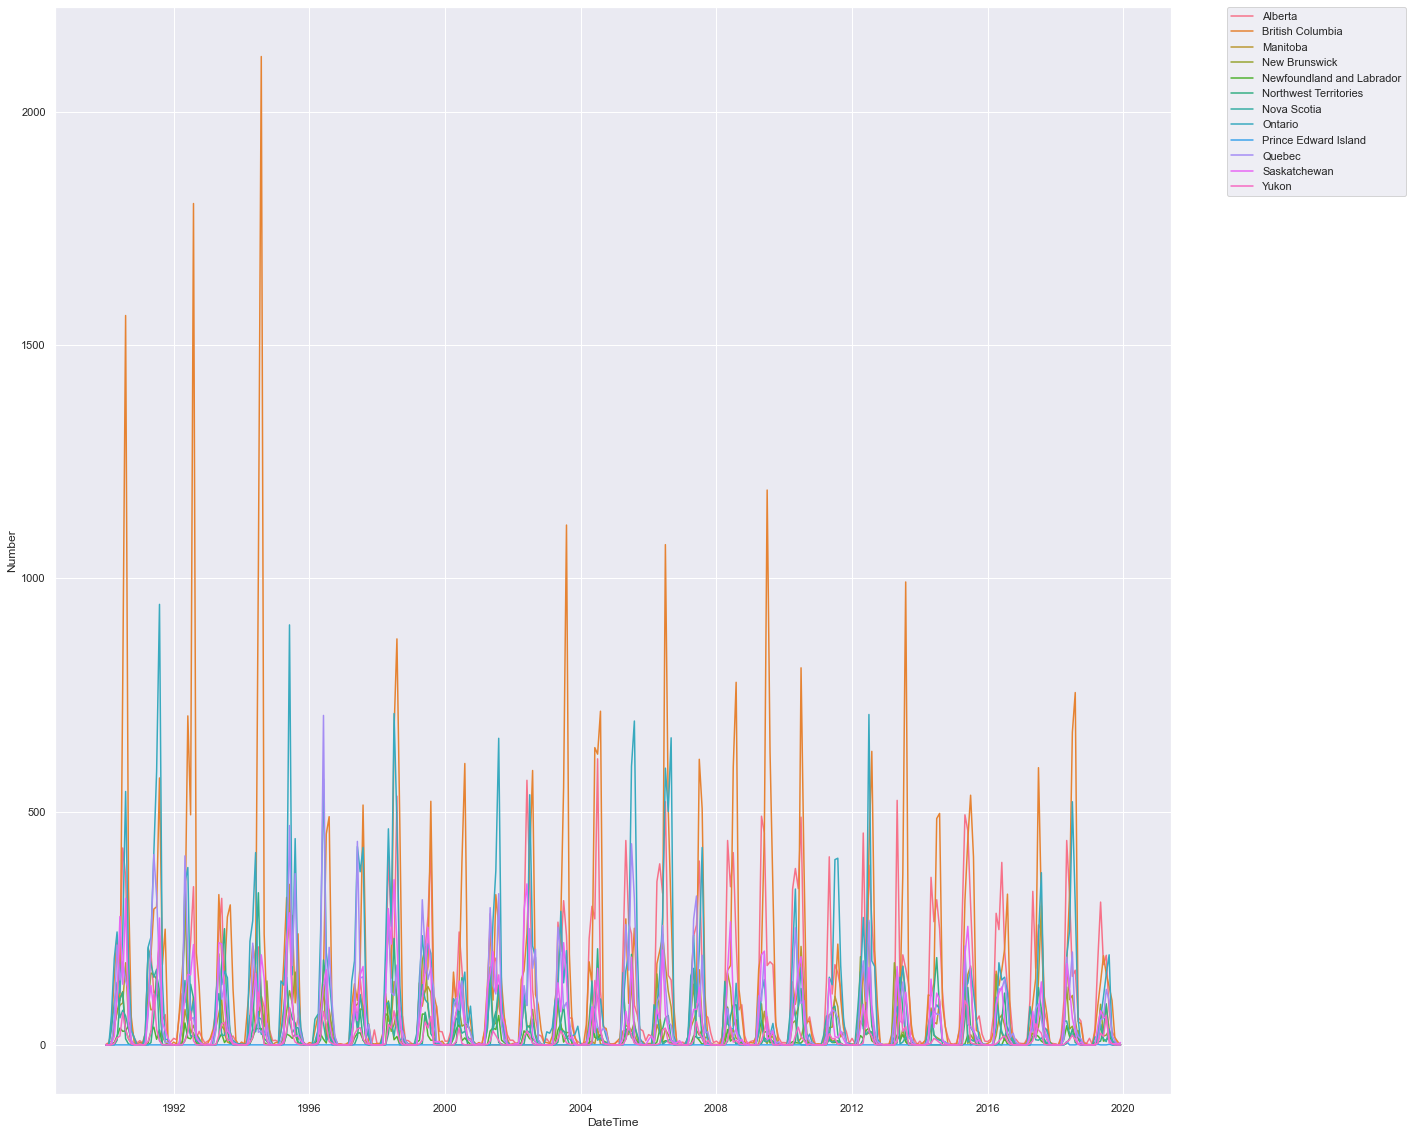

In [29]:
sns.set(style = "darkgrid")
plt.figure(figsize=(20,20))
sns.lineplot(x="DateTime", y="Number", hue="Jurisdiction", data = dataByMonth)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

This plot shows the number of fires over time for each province. There's alot going on and it's a bit difficult to see much of a trend because of the huge spikes every summer.

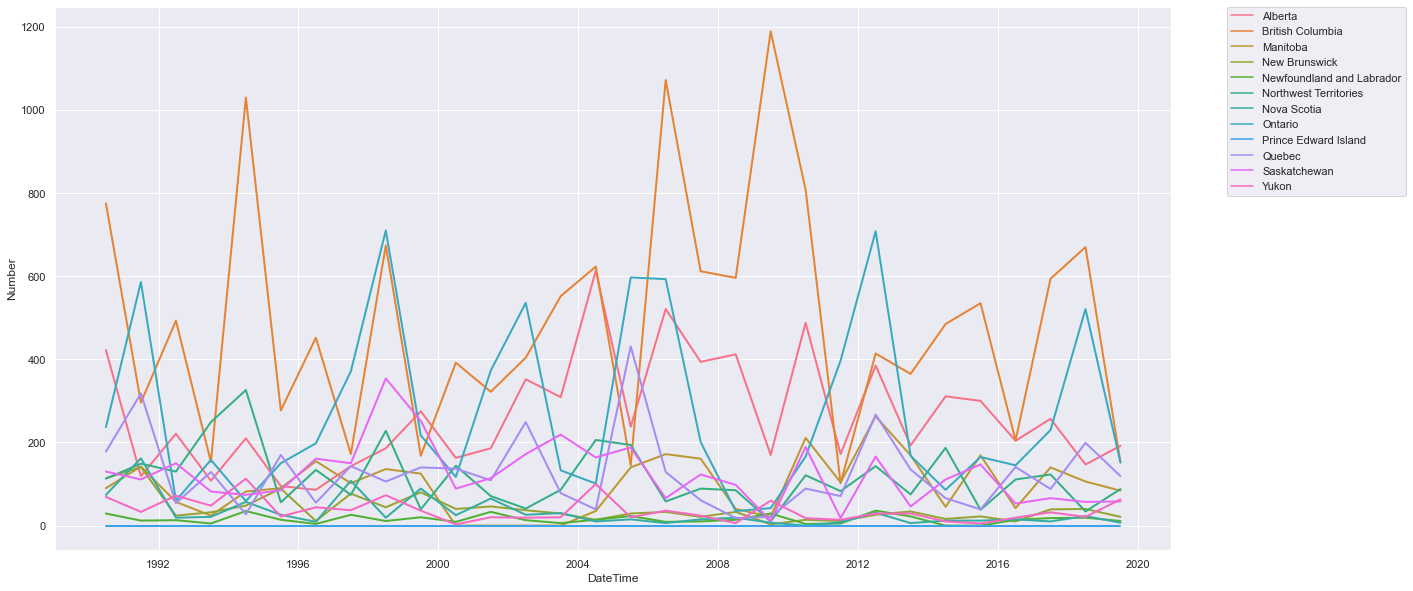

In [26]:
sns.set(style = "darkgrid")
plt.figure(figsize=(20,10))
sns.lineplot(x="DateTime", y="Number", hue="Jurisdiction", data = dataByMonth[dataByMonth["Month"] == "July"], linewidth = 2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

This plots the number of fires for each month in July each year. Of course lost of data is being lost in this visulization but it's alot easier to understand whats going on. You can see which provinces consitantly have more fires. You can also see that there is some corolation between the peaks and dips of the different provinces.

No handles with labels found to put in legend.


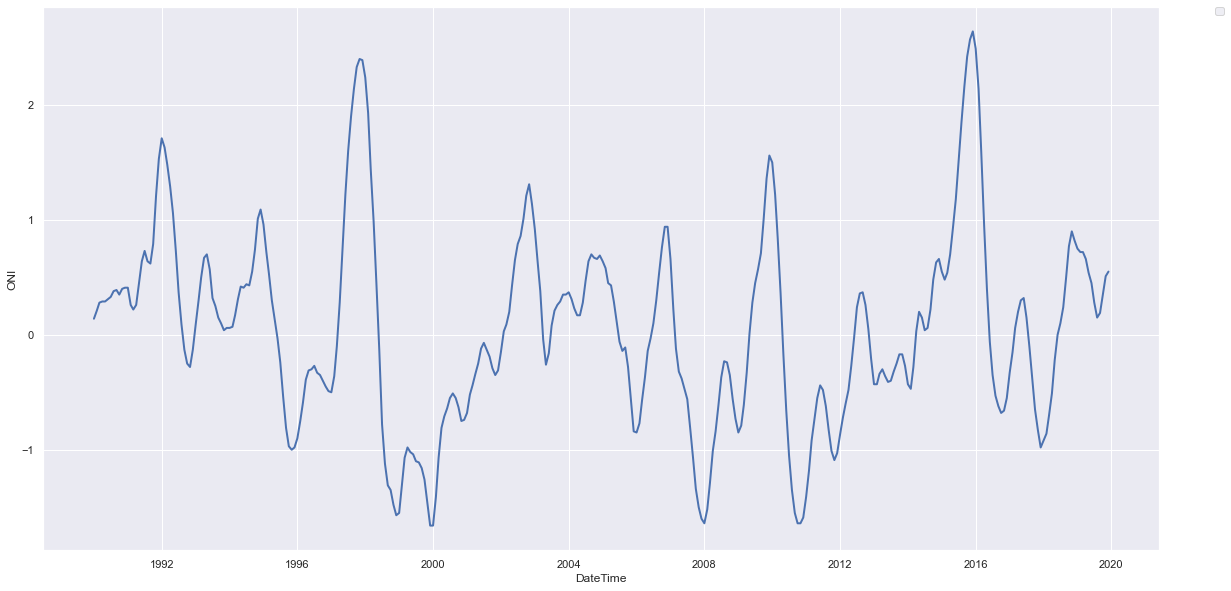

In [38]:
sns.set(style = "darkgrid")
plt.figure(figsize=(20,10))
sns.lineplot(x="DateTime", y="ONI", data = dataByMonth[dataByMonth["Jurisdiction"] == "Alberta"], linewidth = 2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

This plot shows ONI values over time. By itself It's not super meaningfull but it gives you an idea of how the value fluctuates over time

In [ ]:
sns.pairplot(dataByMonth, hue)